In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create list of cities

## Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

## Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

## Create a list for holding the cities.
cities = []

## Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    ## If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
## Print the city count to confirm sufficient count.
#len(cities)

598

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4aaf526f731ea82acff5774904596bb5


In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        #print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
#print("-----------------------------")
#print("Data Retrieval Complete      ")
#print("-----------------------------")
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marystown
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | constitucion
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | sao borja
Processing Record 9 of Set 1 | kangaatsiaq
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | banjar
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | jacareacanga
Processing Record 16 of Set 1 | tondano
Processing Record 17 of Set 1 | muros
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | gunjur
Processing Record 22 of Set 1 | lebu
Processing Record 23 of Set 1 | sehithwa
Proc

Processing Record 34 of Set 4 | kumi
Processing Record 35 of Set 4 | boguchany
Processing Record 36 of Set 4 | vysokogornyy
Processing Record 37 of Set 4 | ustikolina
Processing Record 38 of Set 4 | airai
Processing Record 39 of Set 4 | mehamn
Processing Record 40 of Set 4 | hilo
Processing Record 41 of Set 4 | rongcheng
Processing Record 42 of Set 4 | peniche
Processing Record 43 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 44 of Set 4 | sokolo
Processing Record 45 of Set 4 | tambura
Processing Record 46 of Set 4 | kayerkan
Processing Record 47 of Set 4 | mount isa
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | boueni
Processing Record 50 of Set 4 | evensk
Processing Record 1 of Set 5 | sioux lookout
Processing Record 2 of Set 5 | fairbanks
Processing Record 3 of Set 5 | safakulevo
Processing Record 4 of Set 5 | urengoy
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | ushibuka
Processin

Processing Record 20 of Set 8 | bathsheba
Processing Record 21 of Set 8 | bani walid
Processing Record 22 of Set 8 | dawlatabad
Processing Record 23 of Set 8 | san patricio
Processing Record 24 of Set 8 | omachi
Processing Record 25 of Set 8 | nuuk
Processing Record 26 of Set 8 | casper
Processing Record 27 of Set 8 | baymak
Processing Record 28 of Set 8 | tecoanapa
Processing Record 29 of Set 8 | cherskiy
Processing Record 30 of Set 8 | bassano
Processing Record 31 of Set 8 | mechetinskaya
Processing Record 32 of Set 8 | cam ranh
Processing Record 33 of Set 8 | siocon
Processing Record 34 of Set 8 | port lincoln
Processing Record 35 of Set 8 | tuy hoa
Processing Record 36 of Set 8 | nanhai
Processing Record 37 of Set 8 | tabuk
Processing Record 38 of Set 8 | erenhot
Processing Record 39 of Set 8 | hirara
Processing Record 40 of Set 8 | ostrovnoy
Processing Record 41 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 42 of Set 8 | puro
Processing Record 43 of Set 8 | tu

Processing Record 12 of Set 12 | batagay-alyta
Processing Record 13 of Set 12 | tahe
Processing Record 14 of Set 12 | porto velho
Processing Record 15 of Set 12 | adrar
Processing Record 16 of Set 12 | birnin kebbi
Processing Record 17 of Set 12 | teahupoo
Processing Record 18 of Set 12 | saint-pierre
Processing Record 19 of Set 12 | khasan
Processing Record 20 of Set 12 | snasa
Processing Record 21 of Set 12 | lahad datu
Processing Record 22 of Set 12 | deputatskiy
Processing Record 23 of Set 12 | sao filipe
Processing Record 24 of Set 12 | kozelsk
Processing Record 25 of Set 12 | kirando
Processing Record 26 of Set 12 | inuvik
Processing Record 27 of Set 12 | yegros
Processing Record 28 of Set 12 | martapura
Processing Record 29 of Set 12 | lithakia
Processing Record 30 of Set 12 | chapais
Processing Record 31 of Set 12 | iisalmi
Processing Record 32 of Set 12 | karabulak
Processing Record 33 of Set 12 | broken hill
Processing Record 34 of Set 12 | bhadrachalam
Processing Record 35 o

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marystown,CA,2020-08-17 23:27:41,47.17,-55.15,64.00,100,100,7.11
1,Mataura,NZ,2020-08-17 23:27:41,-46.19,168.86,35.01,97,95,4.00
2,Tiksi,RU,2020-08-17 23:27:41,71.69,128.87,45.50,95,100,2.06
3,Barrow,US,2020-08-17 23:27:42,71.29,-156.79,50.00,76,1,19.46
4,Longyearbyen,SJ,2020-08-17 23:27:42,78.22,15.64,44.60,81,75,8.05
5,Constitucion,CL,2020-08-17 23:23:20,-35.33,-72.42,48.96,80,6,11.59
6,Kapaa,US,2020-08-17 23:27:42,22.08,-159.32,86.00,62,20,14.99
7,Sao Borja,BR,2020-08-17 23:24:41,-28.66,-56.00,54.10,73,0,8.05
8,Kangaatsiaq,GL,2020-08-17 23:27:43,68.31,-53.46,47.77,68,61,1.92
9,Avarua,CK,2020-08-17 23:23:20,-21.21,-159.78,73.40,64,24,13.87


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/17/20'

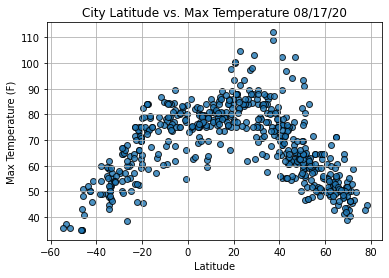

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

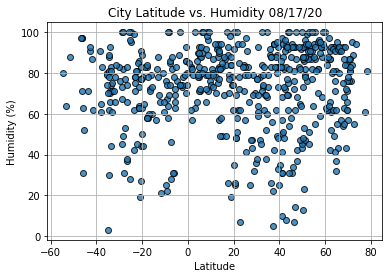

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

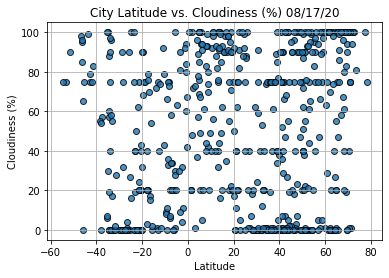

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

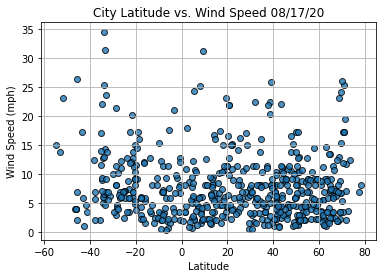

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()